In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
import os
import seaborn as sns

In [54]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist, pdist
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [3]:
fileName = 'C:/Users/mcarp/Downloads/usa_00007.csv/usa_00007.csv'
file = pd.read_csv(fileName)
dfCDI = pd.DataFrame(file)

In [4]:
fileName2 = 'C:/Users/mcarp/Downloads/county_merged_vals - Sheet1.csv'
file2 = pd.read_csv(fileName2)
dfCty = pd.DataFrame(file2)

In [5]:
dfCDI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1887461 entries, 0 to 1887460
Data columns (total 40 columns):
 #   Column      Dtype  
---  ------      -----  
 0   YEAR        int64  
 1   MULTYEAR    int64  
 2   SAMPLE      int64  
 3   SERIAL      int64  
 4   CBSERIAL    int64  
 5   HHWT        float64
 6   CLUSTER     int64  
 7   CPI99       float64
 8   STATEFIP    int64  
 9   COUNTYFIP   int64  
 10  DENSITY     float64
 11  CITY        int64  
 12  PUMA        int64  
 13  STRATA      int64  
 14  GQ          int64  
 15  OWNERSHP    int64  
 16  OWNERSHPD   int64  
 17  OWNCOST     int64  
 18  RENTGRS     int64  
 19  HHINCOME    int64  
 20  CILAPTOP    int64  
 21  CIHISPEED   int64  
 22  PERNUM      int64  
 23  PERWT       float64
 24  FAMSIZE     int64  
 25  AGE         int64  
 26  RACE        int64  
 27  RACED       int64  
 28  HISPAN      int64  
 29  HISPAND     int64  
 30  EDUC        int64  
 31  EDUCD       int64  
 32  OCCSOC      object 
 33  INDNAIC

In [6]:
dfCDI.describe()

,YEAR,MULTYEAR,SAMPLE,SERIAL,CBSERIAL,HHWT,CLUSTER,CPI99,STATEFIP,COUNTYFIP,...,HISPAN,HISPAND,EDUC,EDUCD,INCTOT,FTOTINC,INCWAGE,MIGCOUNTY1,MOVEDIN,TRANTIME
count,1887461.0,1.887461e+06,1887461.0,1.887461e+06,1.887461e+06,1.887461e+06,1.887461e+06,1.887461e+06,1887461.0,1.887461e+06,...,1.887461e+06,1.887461e+06,1.887461e+06,1.887461e+06,1.887461e+06,1.887461e+06,1.887461e+06,1.887461e+06,1.887461e+06,1.887461e+06
mean,2019.0,2.017007e+03,201903.0,7.161752e+05,2.017008e+12,1.950090e+01,2.019007e+12,6.520000e-01,6.0,5.322070e+01,...,5.212203e-01,5.395687e+01,6.112827e+00,6.350181e+01,1.733883e+06,5.430318e+05,2.107476e+05,6.346545e+00,1.470495e+00,1.281491e+01
std,0.0,1.414209e+00,0.0,2.177509e+05,1.414360e+09,1.395353e+01,2.177509e+06,1.789791e-12,0.0,2.819463e+01,...,9.677537e-01,1.037007e+02,3.402226e+00,3.383771e+01,3.734217e+06,2.020262e+06,3.771700e+05,2.284799e+01,2.260702e+00,2.181307e+01
min,2019.0,2.015000e+03,201903.0,3.422620e+05,2.015000e+12,1.000000e+00,2.019003e+12,6.520000e-01,6.0,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,-1.165400e+04,-1.575500e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2019.0,2.016000e+03,201903.0,5.280200e+05,2.016000e+12,1.100000e+01,2.019005e+12,6.520000e-01,6.0,3.700000e+01,...,0.000000e+00,0.000000e+00,3.000000e+00,3.000000e+01,1.018100e+04,4.072500e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2019.0,2.017000e+03,201903.0,7.092400e+05,2.017001e+12,1.500000e+01,2.019007e+12,6.520000e-01,6.0,5.900000e+01,...,0.000000e+00,0.000000e+00,6.000000e+00,6.500000e+01,3.590000e+04,8.449400e+04,2.357000e+04,0.000000e+00,0.000000e+00,0.000000e+00
75%,2019.0,2.018000e+03,201903.0,9.046820e+05,2.018001e+12,2.400000e+01,2.019009e+12,6.520000e-01,6.0,7.300000e+01,...,1.000000e+00,1.000000e+02,1.000000e+01,1.010000e+02,1.124000e+05,1.565180e+05,1.065370e+05,0.000000e+00,3.000000e+00,2.000000e+01
max,2019.0,2.019000e+03,201903.0,1.090399e+06,2.019010e+12,4.720000e+02,2.019011e+12,6.520000e-01,6.0,1.130000e+02,...,4.000000e+00,4.980000e+02,1.100000e+01,1.160000e+02,9.999999e+06,9.999999e+06,9.999990e+05,8.100000e+02,7.000000e+00,1.420000e+02


In [7]:
dfCDI['affrentdec']= dfCDI['RENTGRS']/dfCDI['FTOTINC'] 
dfCDI['affrentbin'] = [0 if x >=.3 else 1 for x in dfCDI['affrentdec']]
dfCDI['affrentbin'].value_counts()

1    1851700
0      35761
Name: affrentbin, dtype: int64

In [8]:
dfCDI['EDUC'].describe()

count    1.887461e+06
mean     6.112827e+00
std      3.402226e+00
min      0.000000e+00
25%      3.000000e+00
50%      6.000000e+00
75%      1.000000e+01
max      1.100000e+01
Name: EDUC, dtype: float64

In [9]:
dfCDI['EDUCbin'] = [1 if x >=8 else 0 for x in dfCDI['EDUC']]

In [10]:
dfCDI['CIHISPEED'].value_counts()

10    1401605
0      247588
20     238268
Name: CIHISPEED, dtype: int64

In [11]:
dfCDI['OWNERSHP'].value_counts()

1    1109153
2     698519
0      79789
Name: OWNERSHP, dtype: int64

In [12]:
dfCDI['TRANTIME'].value_counts()

0      1082661
30      118512
15      110400
20      108637
10       86031
        ...   
91           2
103          2
113          1
117          1
104          1
Name: TRANTIME, Length: 120, dtype: int64

In [13]:
dfCDI.shape

(1887461, 43)

In [14]:
dfCDI = dfCDI[dfCDI['OWNERSHP']!=0]
dfCDI.shape

(1807672, 43)

In [15]:
dfCDI.head()

,YEAR,MULTYEAR,SAMPLE,SERIAL,CBSERIAL,HHWT,CLUSTER,CPI99,STATEFIP,COUNTYFIP,...,INDNAICS,INCTOT,FTOTINC,INCWAGE,MIGCOUNTY1,MOVEDIN,TRANTIME,affrentdec,affrentbin,EDUCbin
0,2019,2015,201903,342262,2015000000008,20.0,2019003422623,0.652,6,59,...,424M,56113,56113,53955,0,2,10,0.021546,1,1
1,2019,2015,201903,342262,2015000000008,20.0,2019003422623,0.652,6,59,...,522M,0,56113,0,0,0,0,0.021546,1,0
2,2019,2015,201903,342263,2015000000009,15.0,2019003422633,0.652,6,81,...,5411,0,250353,0,85,1,0,0.000000,1,1
3,2019,2015,201903,342263,2015000000009,15.0,2019003422633,0.652,6,81,...,3341,250353,250353,248194,85,0,25,0.000000,1,1
4,2019,2015,201903,342263,2015000000009,15.0,2019003422633,0.652,6,81,...,0,9999999,250353,999999,85,0,0,0.000000,1,0


In [16]:
#joined2019 = dfCDI.join(dfCty,on='COUNTYFIP',how='inner',lsuffix='str')

In [17]:
#joined2019

In [39]:
print(dfCDI.columns.get_loc("affrentbin"))
print(dfCDI.columns.get_loc("OWNERSHP"))
print(dfCDI.columns.get_loc("EDUCbin"))
print(dfCDI.columns.get_loc("CIHISPEED"))
print(dfCDI.columns.get_loc("TRANTIME"))
#print(joined2019.columns.get_loc("DrinkingWater"))
#print(joined2019.columns.get_loc("AirQuality"))
#print(joined2019.columns.get_loc("EarlyEd"))
#print(joined2019.columns.get_loc("ProspNeigh"))

41
15
42
21
39


In [40]:
X = dfCDI.iloc[:, [41,15,42,21,39]]

In [69]:
X.shape

(1807672, 5)

In [70]:
scaler=StandardScaler()
scalerNum = scaler.fit(X)
Xstd = scalerNum.transform(X)

In [38]:
#print('Aff. Rent:',X['affrentbin'].max(), X['affrentbin'].min())
#print('Home Ownership:',X['OWNERSHP'].max(), X['OWNERSHP'].min())
#print('Education:',X['EDUCbin'].max(), X['EDUCbin'].min())
#print('Broadband:',X['CIHISPEED'].max(), X['CIHISPEED'].min())
#print('Commute Time:',X['TRANTIME'].max(), X['TRANTIME'].min())
#print('Drinking Water:',X['DrinkingWater'].max(), X['DrinkingWater'].min())
#print('Air Quality:',X['AirQuality'].max(), X['AirQuality'].min())
#print('Early Ed.:',X['EarlyEd'].max(), X['EarlyEd'].min())
#print('Prosp. Neighb:',X['ProspNeigh'].max(), X['ProspNeigh'].min())
#X.loc[:,'affrentbin'] = (X['affrentbin'] - X['affrentbin'].max())/(X['affrentbin'].min() - X['affrentbin'].max()) # reversed
#X.loc[:,'OWNERSHP'] = (X['OWNERSHP'] - X['OWNERSHP'].max())/(X['OWNERSHP'].min() - X['OWNERSHP'].max()) # reversed + normalized
#X.loc[:,'CIHISPEED'] = X['CIHISPEED']/20
#X.loc[:,'TRANTIME'] = (X['TRANTIME'] - X['TRANTIME'].max())/(X['TRANTIME'].min() - X['TRANTIME'].max()) # reversed
#X.loc[:,'DrinkingWater'] = (X['DrinkingWater'] - X['DrinkingWater'].min())/(X['DrinkingWater'].max() - X['DrinkingWater'].min())
#X.loc[:,'AirQuality'] = (X['AirQuality'] - X['AirQuality'].max())/(X['AirQuality'].min() - X['AirQuality'].max()) # reversed + normalized
#X.loc[:,'EarlyEd'] = (X['EarlyEd'] - X['EarlyEd'].min())/(X['EarlyEd'].max() - X['EarlyEd'].min())
#X.loc[:,'ProspNeigh'] = (X['ProspNeigh'] - X['ProspNeigh'].min())/(X['ProspNeigh'].max() - X['ProspNeigh'].min())

In [71]:
dfX = pd.DataFrame(Xstd, columns=['affrentbin','OWNERSHP','EDUCbin','CIHISPEED','TRANTIME'])
dfX.describe()

,affrentbin,OWNERSHP,EDUCbin,CIHISPEED,TRANTIME
count,1.807672e+06,1.807672e+06,1.807672e+06,1.807672e+06,1.807672e+06
mean,9.181106e-14,1.451496e-13,6.368109e-13,1.723131e-12,-1.670772e-13
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-7.039084e+00,-7.935849e-01,-7.026480e-01,-2.199599e+00,-6.012084e-01
25%,1.420639e-01,-7.935849e-01,-7.026480e-01,-8.253031e-02,-6.012084e-01
50%,1.420639e-01,-7.935849e-01,-7.026480e-01,-8.253031e-02,-6.012084e-01
75%,1.420639e-01,1.260105e+00,1.423188e+00,-8.253031e-02,3.041858e-01
max,1.420639e-01,1.260105e+00,1.423188e+00,2.034539e+00,5.827091e+00


In [59]:
wcss = []
for i in range(1,9):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(dfX)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)
    #cluster_labels = kmeans.fit_predict(dfX)
    #silhouette_avg = silhouette_score(dfX, cluster_labels)
    #print("For n_clusters = {},".format(i)+" the average silhouette_score is :{}".format(silhouette_avg))

C:\Users\mcarp\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


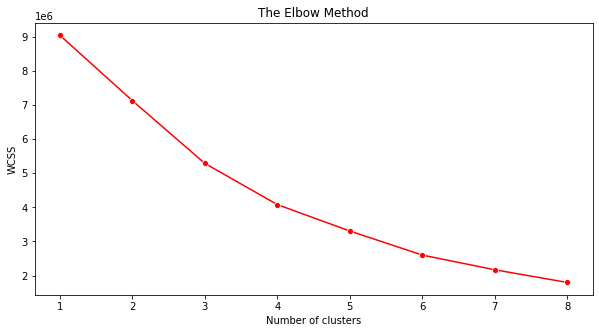

In [60]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1,9), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [72]:
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 42)
kmeans.fit(dfX)
print(kmeans.labels_)

[3 0 3 ... 1 3 3]


In [74]:
Xfin = scaler.inverse_transform(dfX)
Xfin

array([[ 1.,  2.,  1., 10., 10.],
       [ 1.,  2.,  0., 10.,  0.],
       [ 1.,  1.,  1., 10.,  0.],
       ...,
       [ 1.,  1.,  0., 10.,  0.],
       [ 1.,  1.,  1., 10., 10.],
       [ 1.,  1.,  1., 10., 10.]])

In [76]:
dfXfin = pd.DataFrame(Xfin, columns=['affrentbin','OWNERSHP','EDUCbin','CIHISPEED','TRANTIME'])
dfXfin.describe()

,affrentbin,OWNERSHP,EDUCbin,CIHISPEED,TRANTIME
count,1.807672e+06,1.807672e+06,1.807672e+06,1.807672e+06,1.807672e+06
mean,9.802171e-01,1.386419e+00,3.305279e-01,1.038983e+01,1.328059e+01
std,1.392535e-01,4.869287e-01,4.704034e-01,4.723513e+00,2.208983e+01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+01,0.000000e+00
50%,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+01,0.000000e+00
75%,1.000000e+00,2.000000e+00,1.000000e+00,1.000000e+01,2.000000e+01
max,1.000000e+00,2.000000e+00,1.000000e+00,2.000000e+01,1.420000e+02


In [77]:
dfXfin['labels'] = kmeans.labels_
cluster_sum = dfXfin.groupby(by = 'labels').mean()
cluster_sum.head(6)

,affrentbin,OWNERSHP,EDUCbin,CIHISPEED,TRANTIME
labels,,,,,
0,1.0,2.000000,0.000000,8.071762,7.592091
1,1.0,1.000000,0.000000,9.025541,6.383416
2,0.0,2.000000,0.206314,9.710579,5.372445
3,1.0,1.293745,1.000000,9.492928,13.405084
4,1.0,1.337105,0.542434,10.175144,76.413925
5,1.0,1.445757,0.229667,20.000000,9.673193


Text(0.5, 1.0, 'Broadband vs. Commute Time')

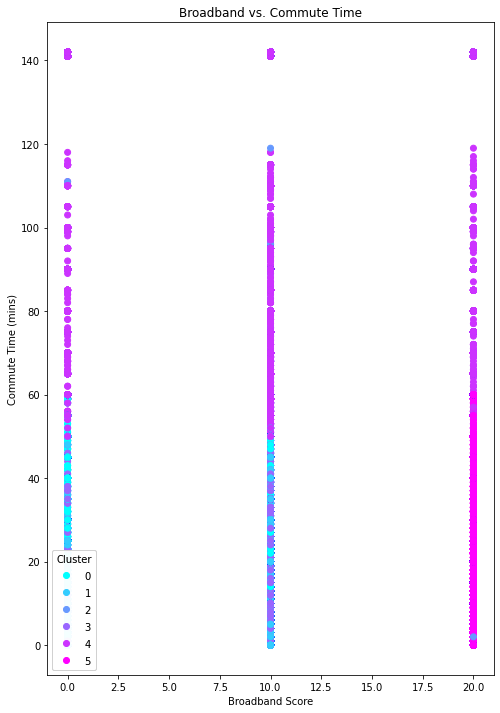

In [89]:
fig, ax = plt.subplots(figsize=(8,12))
scatter = ax.scatter(dfXfin['CIHISPEED'], dfXfin['TRANTIME'], c=dfXfin['labels'], cmap=plt.cm.cool)
ax.set_xlabel('Broadband Score')
ax.set_ylabel('Commute Time (mins)')
legend1=ax.legend(*scatter.legend_elements(),loc="lower left", title="Cluster")
plt.gca().add_artist(legend1)
ax.set_title('Broadband vs. Commute Time')

In [79]:
Xcorr=dfXfin.iloc[:, [0,1,2,3,4]]
Xcorr.head()

,affrentbin,OWNERSHP,EDUCbin,CIHISPEED,TRANTIME
0,1.0,2.0,1.0,10.0,10.0
1,1.0,2.0,0.0,10.0,0.0
2,1.0,1.0,1.0,10.0,0.0
3,1.0,1.0,1.0,10.0,25.0
4,1.0,1.0,0.0,10.0,0.0


<AxesSubplot:>

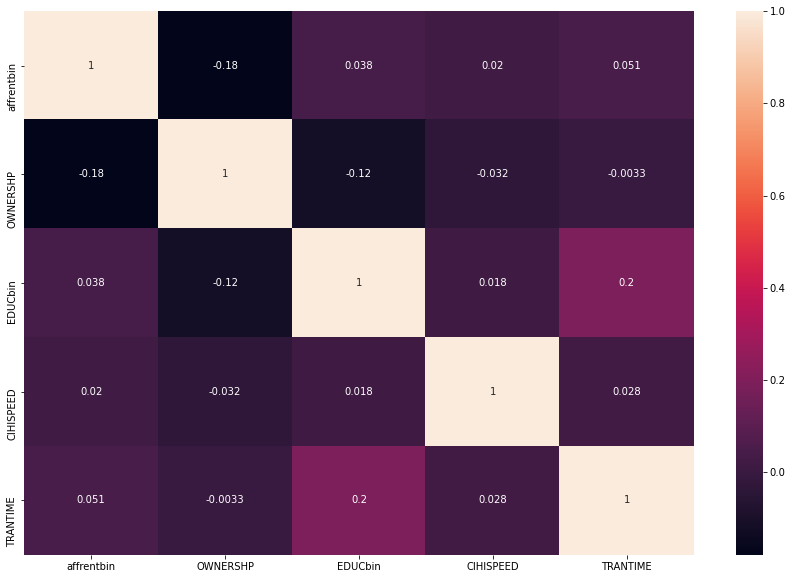

In [80]:
plt.subplots(figsize=(15,10))
sns.heatmap(Xcorr.corr(), annot = True)